In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

In [2]:
data = pd.read_csv("car_price.csv")
data

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,bmw x3,sedan,rwd,front,gas,std,four,six,ohc,mpfi,...,2765,164,3.31,3.19,9.0,121,4250,21,28,21105.0
206,mitsubishi g4,hatchback,fwd,front,gas,std,two,four,ohc,2bbl,...,2328,122,3.35,3.46,8.5,88,5000,25,32,8499.0
207,peugeot 304,sedan,rwd,front,diesel,turbo,four,four,l,idi,...,3197,152,3.70,3.52,21.0,95,4150,28,33,13200.0
208,peugeot 504 (sw),wagon,rwd,front,gas,std,four,four,l,mpfi,...,3230,120,3.46,3.19,8.4,97,5000,19,24,12440.0


In [3]:
# Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           210 non-null    object 
 1   carbody           210 non-null    object 
 2   drivewheel        210 non-null    object 
 3   enginelocation    210 non-null    object 
 4   fueltype          210 non-null    object 
 5   aspiration        210 non-null    object 
 6   doornumber        210 non-null    object 
 7   cylindernumber    210 non-null    object 
 8   enginetype        210 non-null    object 
 9   fuelsystem        210 non-null    object 
 10  symboling         210 non-null    int64  
 11  wheelbase         210 non-null    float64
 12  carlength         210 non-null    float64
 13  carwidth          210 non-null    float64
 14  carheight         210 non-null    float64
 15  curbweight        210 non-null    int64  
 16  enginesize        210 non-null    int64  
 1

In [4]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.828571,98.947143,174.354286,65.935714,53.768571,2565.909524,127.266667,3.333905,3.258286,10.224381,104.000000,5110.476190,25.180952,30.695238,13289.665081
std,1.244757,6.172319,12.457557,2.141794,2.489242,522.279331,41.297095,0.270150,0.311277,4.068746,39.114725,484.530811,6.487059,6.835908,7918.471818
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,3.150000,3.110000,8.525000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.320000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10470.000000
75%,2.000000,102.400000,183.500000,66.900000,55.575000,2953.500000,145.750000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Handling missing value

In [5]:
data.isna().sum()

CarName             0
carbody             0
drivewheel          0
enginelocation      0
fueltype            0
aspiration          0
doornumber          0
cylindernumber      0
enginetype          0
fuelsystem          0
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Handling inconsistance data


In [6]:

data[['Brand', 'Model']] = data['CarName'].str.split(n=1, expand=True)
data['Model'] = data['Model'].str.replace(' ', '') 
data['Model'] = data['Model'].str.extract(r'([^_\(]+)(?:_[^\(]+)?')

In [7]:
data

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100ls
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,bmw x3,sedan,rwd,front,gas,std,four,six,ohc,mpfi,...,3.31,3.19,9.0,121,4250,21,28,21105.0,bmw,x3
206,mitsubishi g4,hatchback,fwd,front,gas,std,two,four,ohc,2bbl,...,3.35,3.46,8.5,88,5000,25,32,8499.0,mitsubishi,g4
207,peugeot 304,sedan,rwd,front,diesel,turbo,four,four,l,idi,...,3.70,3.52,21.0,95,4150,28,33,13200.0,peugeot,304
208,peugeot 504 (sw),wagon,rwd,front,gas,std,four,four,l,mpfi,...,3.46,3.19,8.4,97,5000,19,24,12440.0,peugeot,504


In [8]:
data = data.drop(columns=["CarName","Model"])
data

,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,symboling,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,1,...,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,sedan,fwd,front,gas,std,four,four,ohc,mpfi,2,...,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,sedan,4wd,front,gas,std,four,five,ohc,mpfi,2,...,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,sedan,rwd,front,gas,std,four,six,ohc,mpfi,0,...,164,3.31,3.19,9.0,121,4250,21,28,21105.0,bmw
206,hatchback,fwd,front,gas,std,two,four,ohc,2bbl,3,...,122,3.35,3.46,8.5,88,5000,25,32,8499.0,mitsubishi
207,sedan,rwd,front,diesel,turbo,four,four,l,idi,0,...,152,3.70,3.52,21.0,95,4150,28,33,13200.0,peugeot
208,wagon,rwd,front,gas,std,four,four,l,mpfi,0,...,120,3.46,3.19,8.4,97,5000,19,24,12440.0,peugeot


In [9]:
nominal_column = ["carbody","drivewheel","enginelocation","fueltype","aspiration","enginetype", "fuelsystem","Brand"]

for i in nominal_column:
    print(i)
    print(data[i].unique())
    print()

carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel
['rwd' 'fwd' '4wd']

enginelocation
['front' 'rear']

fueltype
['gas' 'diesel']

aspiration
['std' 'turbo']

enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

Brand
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']



### fix typo

In [10]:
for row, column in data.iterrows():
    if column["Brand"] =="maxda":
        data.at[row,"Brand"] = "mazda"
    elif column["Brand"] =="Nissan":
        data.at[row,"Brand"] = "nissan"
    elif column["Brand"] =="toyouta":
        data.at[row,"Brand"] = "toyota"
    elif column["Brand"] =="porcshce":
        data.at[row,"Brand"] = "porsche"
    elif column["Brand"] =="vokswagen" or column["Brand"] == "vw":
        data.at[row,"Brand"] = "volkswagen"
        

In [11]:
nominal_column = ["carbody","drivewheel","enginelocation","fueltype","aspiration","enginetype", "fuelsystem","Brand"]

for i in nominal_column:
    print(i)
    print(data[i].unique())
    print()

carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel
['rwd' 'fwd' '4wd']

enginelocation
['front' 'rear']

fueltype
['gas' 'diesel']

aspiration
['std' 'turbo']

enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

Brand
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']



### Encoding data

In [12]:
numerical_data = data[["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]

In [13]:
numerical_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,121,4250,21,28,21105.0
206,3,96.3,173.0,65.4,49.4,2328,122,3.35,3.46,8.5,88,5000,25,32,8499.0
207,0,107.9,186.7,68.4,56.7,3197,152,3.70,3.52,21.0,95,4150,28,33,13200.0
208,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,8.4,97,5000,19,24,12440.0


In [14]:
nominal_data = data[["carbody","drivewheel","enginelocation","fueltype","aspiration","enginetype", "fuelsystem","Brand"]]
nominal_data

,carbody,drivewheel,enginelocation,fueltype,aspiration,enginetype,fuelsystem,Brand
0,convertible,rwd,front,gas,std,dohc,mpfi,alfa-romero
1,convertible,rwd,front,gas,std,dohc,mpfi,alfa-romero
2,hatchback,rwd,front,gas,std,ohcv,mpfi,alfa-romero
3,sedan,fwd,front,gas,std,ohc,mpfi,audi
4,sedan,4wd,front,gas,std,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...
205,sedan,rwd,front,gas,std,ohc,mpfi,bmw
206,hatchback,fwd,front,gas,std,ohc,2bbl,mitsubishi
207,sedan,rwd,front,diesel,turbo,l,idi,peugeot
208,wagon,rwd,front,gas,std,l,mpfi,peugeot


In [15]:
nominal_data = pd.get_dummies(nominal_data,dtype="int")
nominal_data

,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
208,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
column_ordinal = ["doornumber","cylindernumber"]
ordinal_variable = data[column_ordinal]

for i in column_ordinal:
    if i == "doornumber":
        category_order  = ['two', 'four']        
        ordinal_encoder = OrdinalEncoder(categories = [category_order])
        ordinal_data= ordinal_variable[i].values.reshape(-1,1)
        encoded_data = ordinal_encoder.fit_transform(ordinal_data)
        ordinal_variable[i] = encoded_data
    elif i == "cylindernumber":
        category_order  = ['two','three','four', 'five','six', 'eight','twelve']        
        ordinal_encoder = OrdinalEncoder(categories = [category_order])
        ordinal_data= ordinal_variable[i].values.reshape(-1,1)
        encoded_data = ordinal_encoder.fit_transform(ordinal_data)
        ordinal_variable[i] = encoded_data
    
    
        

C:\Users\pipit\AppData\Local\Temp\ipykernel_19228\2316504877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_variable[i] = encoded_data
C:\Users\pipit\AppData\Local\Temp\ipykernel_19228\2316504877.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_variable[i] = encoded_data


In [17]:
ordinal_variable

,doornumber,cylindernumber
0,0.0,2.0
1,0.0,2.0
2,0.0,4.0
3,1.0,2.0
4,1.0,3.0
...,...,...
205,1.0,4.0
206,0.0,2.0
207,1.0,2.0
208,1.0,2.0


### Join by index


In [18]:
merging_data_1 = pd.merge(numerical_data,nominal_data, left_index = True, right_index = True)
merging_data_1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,...,0,0,0,0,0,0,0,0,0,0
206,3,96.3,173.0,65.4,49.4,2328,122,3.35,3.46,8.5,...,0,0,0,0,0,0,0,0,0,0
207,0,107.9,186.7,68.4,56.7,3197,152,3.70,3.52,21.0,...,0,1,0,0,0,0,0,0,0,0
208,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,8.4,...,0,1,0,0,0,0,0,0,0,0


In [19]:
final_data = pd.merge(ordinal_variable,merging_data_1,left_index = True, right_index = True )

In [20]:
final_data

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,0.0,2.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,0.0,2.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,0.0,4.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,2,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3.0,2,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,4.0,0,101.2,176.8,64.8,54.3,2765,164,3.31,...,0,0,0,0,0,0,0,0,0,0
206,0.0,2.0,3,96.3,173.0,65.4,49.4,2328,122,3.35,...,0,0,0,0,0,0,0,0,0,0
207,1.0,2.0,0,107.9,186.7,68.4,56.7,3197,152,3.70,...,0,1,0,0,0,0,0,0,0,0
208,1.0,2.0,0,114.2,198.9,68.4,58.7,3230,120,3.46,...,0,1,0,0,0,0,0,0,0,0


### Handling outlier
intreger & float

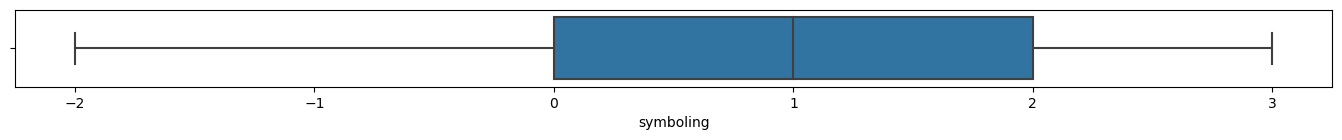

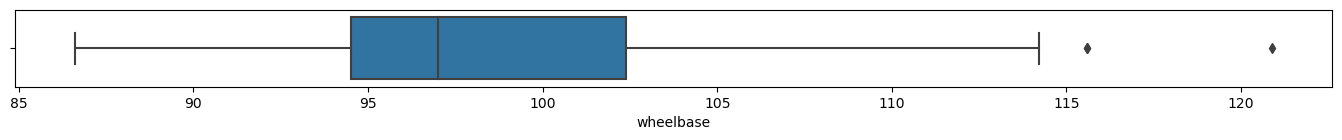

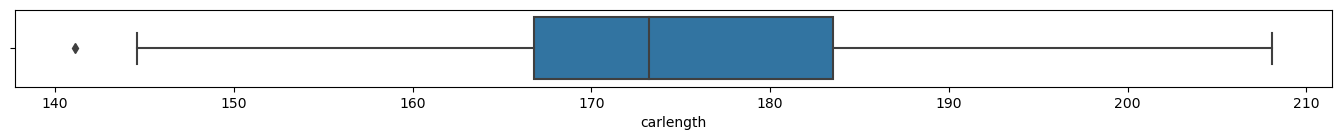

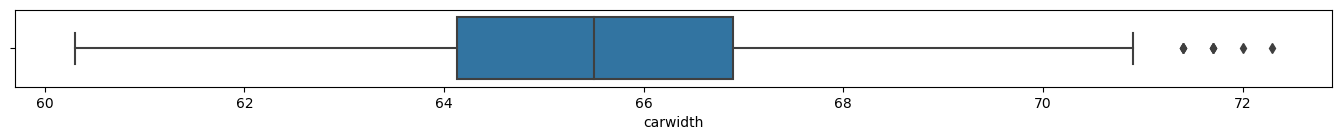

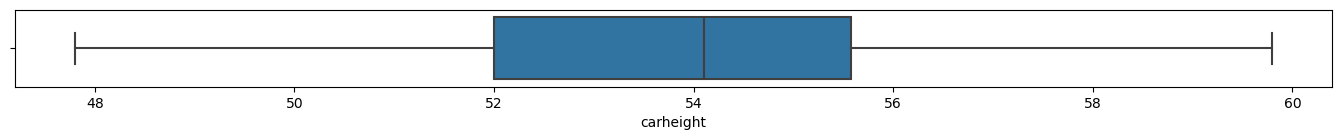

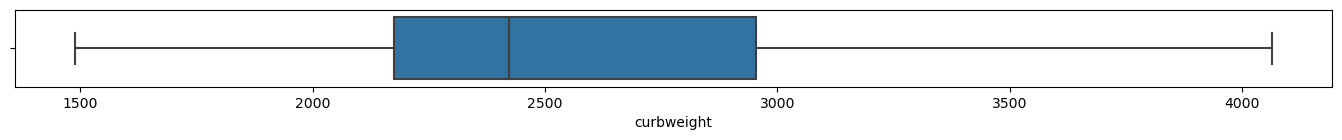

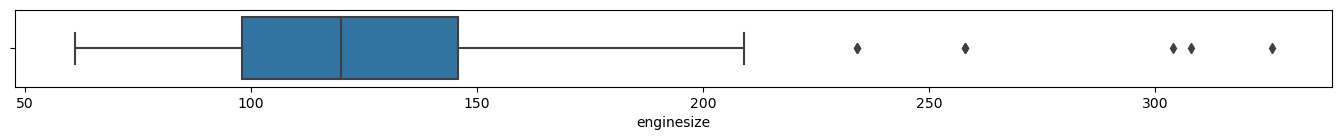

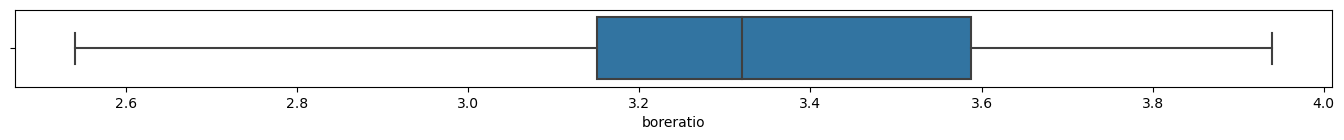

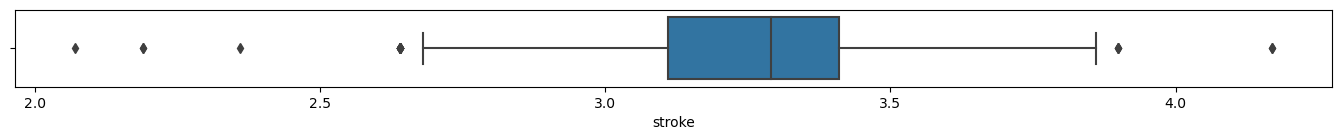

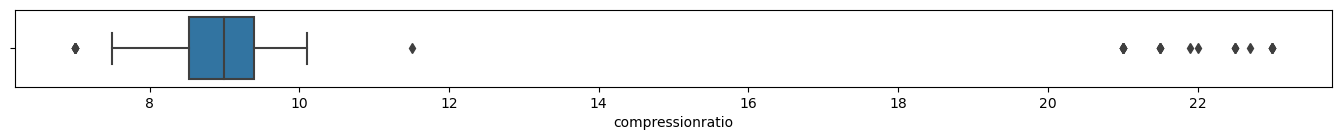

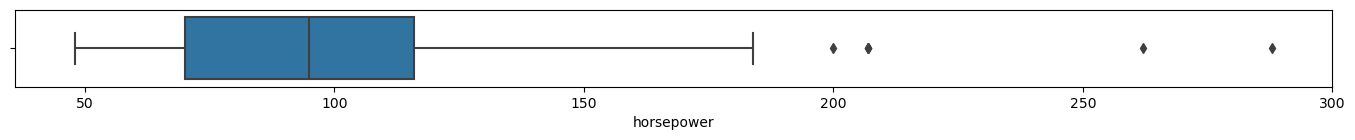

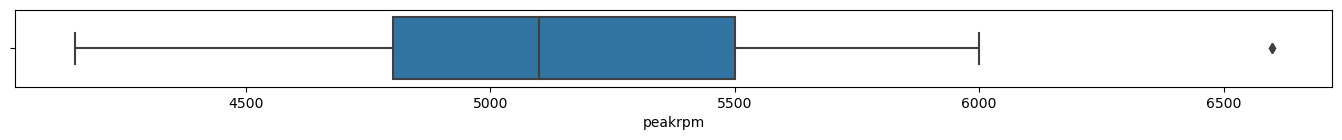

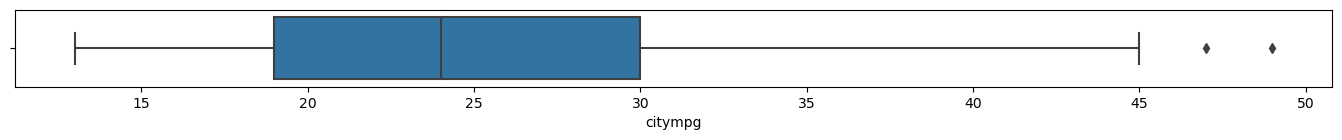

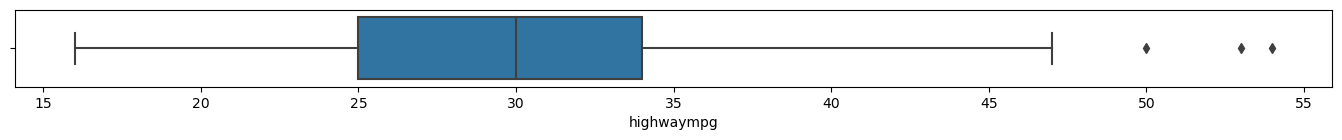

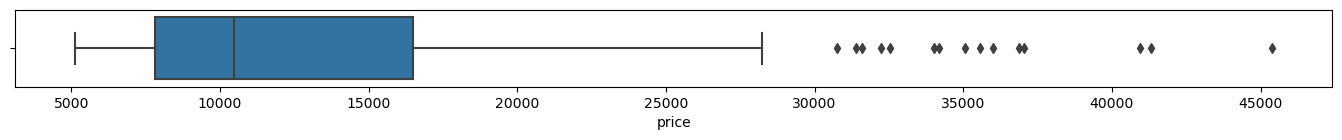

In [21]:
for i in final_data [["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data= final_data [["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]],x=i)

### train test split

In [22]:
x= final_data.drop(columns = "price") #independent variable
y = final_data["price"]

In [23]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [24]:
x_train

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
191,1.0,3.0,0,100.4,180.2,66.9,55.1,2661,136,3.19,...,0,0,0,0,0,0,0,0,1,0
51,0.0,2.0,1,93.1,159.1,64.2,54.1,1900,91,3.03,...,0,0,0,0,0,0,0,0,0,0
109,1.0,2.0,0,114.2,198.9,68.4,58.7,3230,120,3.46,...,0,1,0,0,0,0,0,0,0,0
170,0.0,2.0,2,98.4,176.2,65.6,52.0,2679,146,3.62,...,0,0,0,0,0,0,0,1,0,0
141,1.0,2.0,0,97.2,172.0,65.4,52.5,2145,108,3.62,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.0,2.0,0,97.0,172.0,65.4,54.3,2510,108,3.62,...,0,0,0,0,0,0,1,0,0,0
87,1.0,2.0,1,96.3,172.4,65.4,51.6,2403,110,3.17,...,0,0,0,0,0,0,0,0,0,0
192,1.0,2.0,0,100.4,180.2,66.9,55.1,2579,97,3.01,...,0,0,0,0,0,0,0,0,1,0
131,0.0,2.0,2,96.1,176.8,66.6,50.5,2460,132,3.46,...,0,0,0,0,1,0,0,0,0,0


In [25]:
check = y_train.value_counts()/154
for i,j in check.items():
    print(f"for {i}, the percentage of data is {j}")

for 7295.0, the percentage of data is 0.012987012987012988
for 9279.0, the percentage of data is 0.012987012987012988
for 5572.0, the percentage of data is 0.012987012987012988
for 8495.0, the percentage of data is 0.012987012987012988
for 13860.0, the percentage of data is 0.012987012987012988
for 8921.0, the percentage of data is 0.012987012987012988
for 7957.0, the percentage of data is 0.012987012987012988
for 8499.0, the percentage of data is 0.012987012987012988
for 21105.0, the percentage of data is 0.012987012987012988
for 16500.0, the percentage of data is 0.012987012987012988
for 8845.0, the percentage of data is 0.012987012987012988
for 6229.0, the percentage of data is 0.012987012987012988
for 8916.5, the percentage of data is 0.012987012987012988
for 18150.0, the percentage of data is 0.012987012987012988
for 8189.0, the percentage of data is 0.006493506493506494
for 7499.0, the percentage of data is 0.006493506493506494
for 11900.0, the percentage of data is 0.00649350649

### Scalling

In [26]:
standard_scaler = StandardScaler()
x_train_scaler = standard_scaler.fit_transform(x_train)
x_test_scaler = standard_scaler.transform(x_test)
x_test_scaler 

array([[-1.08711461, -0.36602089,  1.78178267, ..., -0.40824829,
         4.47213595, -0.19245009],
       [ 0.91986621,  1.83010445,  0.10010015, ..., -0.40824829,
        -0.2236068 , -0.19245009],
       [ 0.91986621, -0.36602089, -0.74074111, ..., -0.40824829,
        -0.2236068 , -0.19245009],
       ...,
       [-1.08711461, -0.36602089,  0.94094141, ...,  2.44948974,
        -0.2236068 , -0.19245009],
       [-1.08711461,  0.73204178, -0.74074111, ..., -0.40824829,
        -0.2236068 , -0.19245009],
       [ 0.91986621, -0.36602089, -0.74074111, ..., -0.40824829,
        -0.2236068 , -0.19245009]])

In [27]:
x_train_scaler = pd.DataFrame(x_train_scaler)
x_test_scaler = pd.DataFrame(x_test_scaler)
x_train_scaler.columns = x_train.columns
x_test_scaler.columns = x_test.columns

In [28]:
x_test_scaler

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,-1.087115,-0.366021,1.781783,-0.677403,-0.620509,-0.843854,-0.911342,-0.611276,-0.406645,-0.473234,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,4.472136,-0.192450
1,0.919866,1.830104,0.100100,0.780165,1.222374,0.484071,0.847550,0.988379,0.872688,-0.034998,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.192450
2,0.919866,-0.366021,-0.740741,-0.288718,0.004331,-0.202787,0.520315,-0.229584,-0.429906,1.097112,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,3.974921,-0.408248,-0.223607,-0.192450
3,0.919866,1.830104,-0.740741,0.278114,0.644990,0.300909,0.602124,1.065101,1.268119,0.403238,...,3.316625,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.192450
4,0.919866,-0.366021,-0.740741,2.513051,2.005402,1.170929,1.256595,1.429531,-0.150779,0.512797,...,-0.301511,3.974921,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.192450
5,0.919866,-0.366021,-2.422424,0.909727,1.206556,0.621443,1.052073,0.758213,0.337694,1.681426,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,5.196152
6,0.919866,-0.366021,0.100100,-0.904135,-0.533506,-0.752273,0.193079,-1.131068,-0.825336,-0.874950,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.192450
7,0.919866,-0.366021,0.940941,0.067576,1.032550,0.300909,1.011168,0.589424,-0.127518,0.804954,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,5.709641,-0.251577,-0.408248,-0.223607,-0.192450
8,0.919866,-0.366021,0.100100,-0.806964,-1.284896,-0.935435,-1.238578,-1.056264,-0.848597,-1.276667,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.192450
9,0.919866,-0.366021,-1.581582,0.909727,1.206556,0.621443,1.583831,0.963444,0.337694,1.681426,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,5.196152


In [29]:
x_train_scaler

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,0.919866,0.732042,-0.740741,0.278114,0.526350,0.484071,0.602124,0.232667,0.221391,-0.473234,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,4.472136,-0.19245
1,-1.087115,-0.366021,0.100100,-0.904135,-1.142527,-0.752273,0.193079,-1.226971,-0.825336,-1.057549,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.19245
2,0.919866,-0.366021,-0.740741,2.513051,2.005402,1.170929,2.074685,1.324038,-0.150779,0.512797,...,-0.301511,3.974921,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.19245
3,-1.087115,-0.366021,0.940941,-0.045790,0.209975,-0.111206,-0.665915,0.267191,0.453997,1.097112,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,2.449490,-0.223607,-0.19245
4,0.919866,-0.366021,-0.740741,-0.240132,-0.122219,-0.202787,-0.461393,-0.757048,-0.429906,1.097112,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,3.974921,-0.408248,-0.223607,-0.19245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.919866,-0.366021,-0.740741,-0.272523,-0.122219,-0.202787,0.274888,-0.056959,-0.429906,1.097112,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,3.974921,-0.408248,-0.223607,-0.19245
164,0.919866,-0.366021,0.100100,-0.385889,-0.090581,-0.202787,-0.829533,-0.262191,-0.383385,-0.546273,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,-0.223607,-0.19245
165,0.919866,-0.366021,-0.740741,0.278114,0.526350,0.484071,0.602124,0.075386,-0.685773,-1.130588,...,-0.301511,-0.251577,-0.208514,-0.175142,-0.077382,-0.175142,-0.251577,-0.408248,4.472136,-0.19245
166,-1.087115,-0.366021,0.940941,-0.418280,0.257431,0.346700,-1.279482,-0.152862,0.128349,0.512797,...,-0.301511,-0.251577,-0.208514,-0.175142,12.922848,-0.175142,-0.251577,-0.408248,-0.223607,-0.19245


### PCA

#### check how many column reduction best for result (closer to prediction with less capacity)

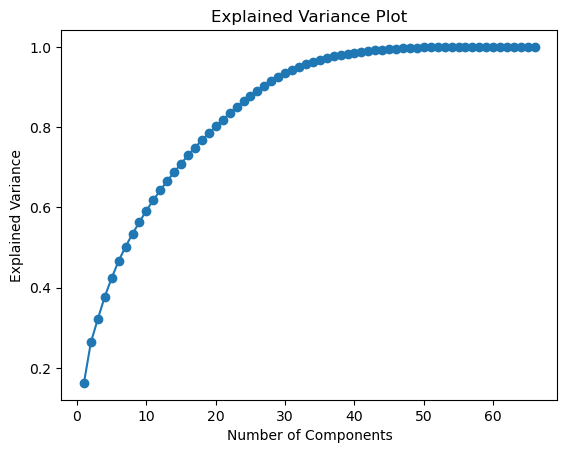

In [30]:
explained_variant =[]
result = {}

for i in range(1,67):
    pca = PCA(n_components = i)
    new_x_train = pca.fit(x_train_scaler)
    explained_variant.append(np.sum(pca.explained_variance_ratio_))
    result[i] = np.sum(pca.explained_variance_ratio_)

plt.plot(range(1, 67), explained_variant, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Plot')
plt.show()
    

In [31]:
result

{1: 0.1622998555535011,
 2: 0.26351815965156244,
 3: 0.32155354840932937,
 4: 0.37740673131250246,
 5: 0.42407312698138555,
 6: 0.46645636948423685,
 7: 0.5020523246352672,
 8: 0.5338920195560886,
 9: 0.5633516307552721,
 10: 0.5921430185772336,
 11: 0.6178808708190726,
 12: 0.6425917644342567,
 13: 0.6658601579783586,
 14: 0.6875394089515818,
 15: 0.7089812357988369,
 16: 0.7296324378370873,
 17: 0.749059215844993,
 18: 0.7674846620914557,
 19: 0.784672799853029,
 20: 0.8016188186041362,
 21: 0.8182352944542057,
 22: 0.8341069397786387,
 23: 0.8498292024575608,
 24: 0.8648754928622716,
 25: 0.8788262628622475,
 26: 0.8911249249950512,
 27: 0.9028594741655562,
 28: 0.9139775089095803,
 29: 0.9244403724489418,
 30: 0.9339427824729438,
 31: 0.943126581777419,
 32: 0.9508836159341694,
 33: 0.9575215916522671,
 34: 0.9632343637737472,
 35: 0.9681555412433591,
 36: 0.9724277637126034,
 37: 0.9765106903792018,
 38: 0.9800191353577895,
 39: 0.9829117359312293,
 40: 0.9854658786247894,
 41: 0.

#### with reduction from 67 to 27 colums , accuracy still 90%

### PCA

In [32]:
pca = PCA(n_components = 27)
new_x_train = pca.fit_transform(x_train_scaler)
new_x_train = pd.DataFrame (new_x_train)
new_x_train

new_x_test = pca.transform(x_test_scaler)
new_x_test = pd.DataFrame (new_x_test)
new_x_test

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-2.017495,1.228301,-0.040146,1.206852,-0.689041,-0.290098,0.413905,-0.957447,1.059882,1.939506,...,0.716803,0.856135,0.546905,0.425411,0.374911,-0.094935,2.714982,0.592507,-2.216676,0.641115
1,3.338776,0.413931,-1.960833,-1.253903,-0.500269,-0.745021,-0.396573,-1.363457,0.982548,-0.411691,...,0.864775,0.727043,-0.404948,-2.396992,-0.376491,-0.654131,-0.481531,1.362041,0.050631,0.411021
2,-0.084624,0.370296,2.034292,-4.943519,3.748150,3.870904,0.093882,0.569685,-2.173656,1.418853,...,0.945130,-0.162538,0.251033,-0.522031,0.145761,-0.067047,-0.000569,1.278762,-0.174971,-1.110451
3,3.037529,1.247206,-2.235605,-1.413714,-0.915535,-0.059644,-0.973544,0.318092,-1.867790,0.278346,...,-0.239651,-0.097477,2.238063,-0.847914,0.002854,0.036238,-0.023032,-0.185953,0.391049,0.739533
4,4.419356,-1.120799,0.488428,-2.361513,4.075207,-0.060966,2.104172,2.468442,2.324350,-2.341355,...,0.809279,-0.324022,-0.231828,-0.136870,-0.413422,-0.221242,0.649456,-0.217227,-0.435975,1.377783
5,2.977610,-0.363911,-1.779860,-1.494185,0.569655,-0.528929,1.161592,-1.507569,0.395773,-1.027727,...,-0.013533,-0.420410,1.111416,2.223963,-0.289355,-0.673140,-1.062360,0.034800,-1.461316,-0.213750
6,-2.998697,-0.800107,-0.614813,-1.086841,0.527358,-0.804734,-0.641293,-1.703753,-0.341608,-0.739908,...,0.268181,0.081027,-0.827561,0.260303,0.091872,1.028693,-0.966456,-0.484184,-0.422092,-0.490076
7,2.318449,0.738347,-0.651640,0.672478,0.864453,1.637512,1.391946,-0.386761,2.317118,3.159776,...,-2.743920,-1.001705,-0.546938,-1.504785,0.000202,-0.533336,-0.959130,-0.002977,2.077967,-1.736761
8,-3.648429,-0.402514,-0.735931,-0.757274,-0.568857,0.040917,-0.311674,-0.695542,0.354399,-0.503285,...,-1.127655,2.609299,-1.623484,-0.196972,-2.663876,-0.309303,1.014915,-1.217683,0.910701,-0.384033
9,3.025485,-0.330995,-1.310630,-1.649147,1.266160,-0.138655,1.511879,-0.364343,0.652903,-1.291935,...,1.043130,-0.190399,1.360789,1.607620,-0.286359,-0.808411,-0.648394,1.937302,-1.407831,-0.077905


## Machine Learning
###

### Supervise regression linier

In [33]:
linear = LinearRegression()
linear

LinearRegression()

In [34]:
linear.fit(new_x_train, y_train)


LinearRegression()

In [35]:
y_linear_prediction = linear.predict(new_x_test)
y_linear_prediction

array([ 8421.3840841 , 25858.785205  ,  9312.07218512, 19136.03849249,
       12832.31762046, 16183.06652207,  8309.25246952, 16769.58088307,
        7026.64714598, 14702.0362194 , 10533.086804  , 19364.40478304,
       19777.10414176, 16113.17280351,  5855.67084866, 10945.82083695,
       16968.34933112, 18863.54236416,  9167.70629974,  8774.01005699,
        7026.64714598, 13566.39318188,  6304.6708218 ,  4733.19480979,
       33539.80685717, 11033.47357148, 17587.48878324, 15058.96107574,
       15521.00953594,  5321.02161449, 13449.89656205, 10522.55932285,
       13385.40204546,  9602.80729009, 15571.74338348,  4316.64366868,
       18955.70970113, 28252.97120398,  9598.31541571, 13604.28897312,
       28716.26514904, 15645.60093576])

### KNN regression

In [36]:
neigh = KNeighborsRegressor(n_neighbors=2, p=1)
neigh

KNeighborsRegressor(n_neighbors=2, p=1)

In [37]:
neigh.fit(new_x_train, y_train)


KNeighborsRegressor(n_neighbors=2, p=1)

In [38]:
y_neigh_prediction = neigh.predict(new_x_test)
y_neigh_prediction

array([ 8345. , 21105. ,  9578.5, 13949. , 14010. , 17782.5,  8470. ,
       16830. ,  6303. , 13177.5, 10618. , 19049. , 15874. , 18020. ,
        6399. , 10618. , 17782.5, 12768. , 10571.5,  8745. ,  6303. ,
       13121. ,  7848. ,  8098. , 43180. ,  9431. , 20835. ,  7167. ,
       16500. ,  5789. , 14535. ,  5863. ,  9743. , 11645. , 15050. ,
        8474. , 18767.5, 28576. ,  8345. ,  9743. , 28576. , 15050. ])

### Decision tree 

In [39]:
dectree = DecisionTreeRegressor(max_depth = 10 ,min_samples_split= 6, min_samples_leaf= 4, max_features=None)
dectree

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=6)

In [40]:
dectree.fit(new_x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=6)

In [41]:
y_dectree_prediction = neigh.predict(new_x_test)
y_dectree_prediction

array([ 8345. , 21105. ,  9578.5, 13949. , 14010. , 17782.5,  8470. ,
       16830. ,  6303. , 13177.5, 10618. , 19049. , 15874. , 18020. ,
        6399. , 10618. , 17782.5, 12768. , 10571.5,  8745. ,  6303. ,
       13121. ,  7848. ,  8098. , 43180. ,  9431. , 20835. ,  7167. ,
       16500. ,  5789. , 14535. ,  5863. ,  9743. , 11645. , 15050. ,
        8474. , 18767.5, 28576. ,  8345. ,  9743. , 28576. , 15050. ])

### Bagging Regressor



In [42]:
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators = 100, random_state = 42)

In [43]:
bagging.fit(new_x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

In [44]:
y_bagging_prediction = bagging.predict(new_x_test)
y_bagging_prediction

array([ 9116.82333333, 20408.73      , 11792.9       , 21850.895     ,
       15702.54      , 15052.87167   ,  6905.55      , 17789.12336   ,
        6591.025     , 14899.23167   , 10889.54      , 20367.79667   ,
       17009.15167   , 17780.46668   ,  6264.595     , 11299.55      ,
       16780.05      , 16658.15167   , 12696.28      ,  8194.54      ,
        6591.025     , 12937.19      ,  8588.125     ,  6633.26      ,
       37888.82      , 12356.47      , 19745.69501   , 11829.64      ,
       15656.44      ,  6350.60166667, 13203.81      ,  5961.285     ,
       11606.95      , 11158.76      , 14563.08      ,  7832.68      ,
       16338.92      , 28592.27381286,  8925.84666667, 11645.38      ,
       33653.17      , 16043.08      ])

### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
rf.fit(new_x_train, y_train)

In [51]:
y_rf_prediction = bagging.predict(new_x_test)
y_rf_prediction

array([ 9116.82333333, 20408.73      , 11792.9       , 21850.895     ,
       15702.54      , 15052.87167   ,  6905.55      , 17789.12336   ,
        6591.025     , 14899.23167   , 10889.54      , 20367.79667   ,
       17009.15167   , 17780.46668   ,  6264.595     , 11299.55      ,
       16780.05      , 16658.15167   , 12696.28      ,  8194.54      ,
        6591.025     , 12937.19      ,  8588.125     ,  6633.26      ,
       37888.82      , 12356.47      , 19745.69501   , 11829.64      ,
       15656.44      ,  6350.60166667, 13203.81      ,  5961.285     ,
       11606.95      , 11158.76      , 14563.08      ,  7832.68      ,
       16338.92      , 28592.27381286,  8925.84666667, 11645.38      ,
       33653.17      , 16043.08      ])

### Ada Boost Regresor

In [57]:
abr = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth= 10), random_state=42, n_estimators=100)

In [58]:
abr.fit(new_x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  n_estimators=100, random_state=42)

In [56]:
y_abr_prediction = abr.predict(new_x_test)
y_abr_prediction

array([ 8916.5, 21105. , 11245. , 13499. , 14399. , 12940. ,  6849. ,
       18150. ,  6785. , 13415. ,  9988. , 18399. , 15998. , 18150. ,
        6695. , 10698. , 18150. , 15998. , 12945. ,  7995. ,  6785. ,
       11845. ,  8778. ,  6918. , 40960. , 11259. , 21485. , 11595. ,
       16500. ,  6479. , 12440. ,  6189. , 11900. , 11595. , 13200. ,
        7957. , 16430. , 25552. ,  8916.5, 11900. , 40960. , 16900. ])

### Voting


In [62]:
voting = VotingRegressor(estimators= [
    ("neigh", KNeighborsRegressor()),
    ("dectree",DecisionTreeRegressor()),
    ("linear", LinearRegression())])  #utk clasification, voting = "hard/soft"

In [63]:
voting.fit(new_x_train, y_train)

VotingRegressor(estimators=[('neigh', KNeighborsRegressor()),
                            ('dectree', DecisionTreeRegressor()),
                            ('linear', LinearRegression())])

In [64]:
y_voting_prediction = voting.predict(new_x_test)
y_voting_prediction

array([ 9577.12802803, 23943.261735  ,  9884.49072837, 15914.6794975 ,
       14450.77254015, 15675.02217402,  8050.75082317, 16487.86029436,
        6817.74904866, 15339.6787398 ,  9863.69560133, 16822.06826101,
       16047.16804725, 15810.05760117,  6231.22361622, 10001.27361232,
       16873.44977704, 15739.38078805, 11312.30209991,  8678.470019  ,
        6817.74904866, 11602.99772729,  7543.5569406 ,  6358.73160326,
       35196.13561906, 10802.35785716, 19371.49626108, 11587.18702525,
       15460.46984531,  6164.2738715 , 13609.96552068,  7274.98644095,
       11485.93401515,  9781.13576336, 14583.58112783,  6828.21455623,
       19153.23656704, 24731.45706799,  9369.4384719 , 11558.89632437,
       30469.68838301, 15841.53364525])

### Stacking

In [67]:
stack = StackingRegressor(estimators= [
    ("neigh", KNeighborsRegressor()),
    ("dectree",DecisionTreeRegressor()),
    ("linear", LinearRegression())],
    final_estimator= RandomForestRegressor()) 

In [68]:
stack.fit(new_x_train, y_train)

StackingRegressor(estimators=[('neigh', KNeighborsRegressor()),
                              ('dectree', DecisionTreeRegressor()),
                              ('linear', LinearRegression())],
                  final_estimator=RandomForestRegressor())

In [69]:
y_stack_prediction = stack.predict(new_x_test)
y_stack_prediction

array([ 8801.93   , 21562.71501,  9145.72   , 18165.68167, 16267.51   ,
       15392.19   ,  8068.62   , 16818.80167,  7265.83   , 15975.3    ,
        9192.77   , 18264.86501, 16526.99334, 15358.09   ,  6629.28   ,
        9255.7    , 15071.07   , 16485.41334, 10577.66   ,  7853.3    ,
        7265.83   , 12517.89   ,  8637.995  ,  6273.315  , 41060.17   ,
       10522.3    , 18853.11169, 10574.43   , 15575.23   ,  5651.72   ,
       15383.46   ,  7441.91   ,  9424.05   ,  8578.57   , 15848.5    ,
        7606.445  , 18204.39668, 29706.465  ,  9345.05   ,  9391.14   ,
       31687.59   , 14240.68   ])

## Evaluation


### Linear Regr

In [45]:
mean_absolute_percentage_error(y_test,y_linear_prediction)

0.16224672522656786

In [46]:
mean_squared_error(y_test,y_linear_prediction)

4864315.779027181

### KNN

In [47]:
mean_absolute_percentage_error(y_test,y_neigh_prediction)

0.1191842977204479

In [48]:
mean_squared_error(y_test,y_neigh_prediction)

5147438.226190476

### Decision Tree

In [49]:
mean_absolute_percentage_error(y_test,y_dectree_prediction)

0.1191842977204479

In [50]:
mean_squared_error(y_test,y_dectree_prediction)

5147438.226190476